In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#pd.set_option('max_columns', 50)
#mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [2]:
# read an excel file
data = pd.read_excel('cohort DE .xlsx')


In [3]:
df= data
city_name ='Berlin'


df=df[df['city_name'] == city_name]
df=df[df['order_date'] < '2016-05-01']
df.head()

test=df

In [4]:
# add a new column with order month 
# Lambda lets you define one-line mini-functions 
# time.strftime(format[, t]) 
# %m - month (01 to 12)

df['OrderPeriod'] = df.order_date.apply(lambda x: x.strftime('%Y-%m'))
df.head()

order_code_google order_date vendor_code city_name   gfv OrderPeriod
0         kg6y-h1md 2015-06-10      80kg6y    Berlin  17.6     2015-06
1         kg6y-p6wu 2015-06-11      80kg6y    Berlin  43.0     2015-06
2         kg6y-q7di 2015-06-12      80kg6y    Berlin  13.0     2015-06
3         s0wv-h2hg 2015-06-12      80s0wv    Berlin  39.0     2015-06
4         kg6y-k8sq 2015-06-12      80kg6y    Berlin  34.8     2015-06

In [5]:
df.set_index('vendor_code', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['order_date'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)

In [6]:

vendor_tot = df.groupby(['OrderPeriod', 'vendor_code']).sum()
vendor_tot.reset_index(inplace=True)
vendor_tot.head()





OrderPeriod vendor_code    gfv
0     2015-06      80ao4u  260.0
1     2015-06      80bi6q  112.2
2     2015-06      80cm7c  341.0
3     2015-06      80di2d  540.9
4     2015-06      80dk5i  580.0

In [7]:
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])
grouped_1=grouped
# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'vendor_code': pd.Series.nunique,
                       'order_code_google': pd.Series.nunique,
                       'gfv': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'vendor_code': 'TotalVendors',
                        'order_date': 'TotalOrders'}, inplace=True)
#cohorts.head()

In [8]:
#grouped_1.filter(lambda x: x['gfv'].sum() > 2000)

In [9]:
#cohorts.describe()

In [10]:
def cohort_period(df):
   
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [11]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalVendors'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2015-06    58
2015-07    43
2015-08    29
2015-09    42
2015-10    50
Name: TotalVendors, dtype: int64

In [12]:
#cohorts['TotalVendors'].head()

In [13]:
cohorts['TotalVendors'].unstack(0).head()

#cohort_gfv=

CohortGroup   2015-06  2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  \
CohortPeriod                                                                  
1                58.0     43.0     29.0     42.0     50.0     54.0     54.0   
2                51.0     37.0     27.0     40.0     49.0     49.0     51.0   
3                48.0     34.0     26.0     41.0     47.0     47.0     48.0   
4                45.0     33.0     23.0     40.0     47.0     47.0     49.0   
5                43.0     29.0     22.0     40.0     45.0     45.0     48.0   

CohortGroup   2016-01  2016-02  2016-03  2016-04  
CohortPeriod                                      
1                61.0     59.0     50.0     48.0  
2                60.0     57.0     48.0      NaN  
3                56.0     52.0      NaN      NaN  
4                55.0      NaN      NaN      NaN  
5                 NaN      NaN      NaN      NaN

In [14]:
user_retention = cohorts['TotalVendors'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)
user_data_retention = user_retention



In [15]:
#a = user_retention.plot()
#plt.title('Cohorts Vendor Retention:  %s' %city_name)
#plt.xticks(np.arange(1, 12.1, 1))
#plt.xlim(1, 12)
#title2 = city_name
#plt.ylabel('percentage of Cohort Purchasing: --  %s  ' %city_name)
#plt.savefig('cohort_'+title2 +'.png')

In [16]:

#sns.set()
#plt.figure(figsize=(12, 8))
#plt.title('Cohorts: Vendor Retention  - %s' %city_name)
#title1=city_name
#sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='0.00%')

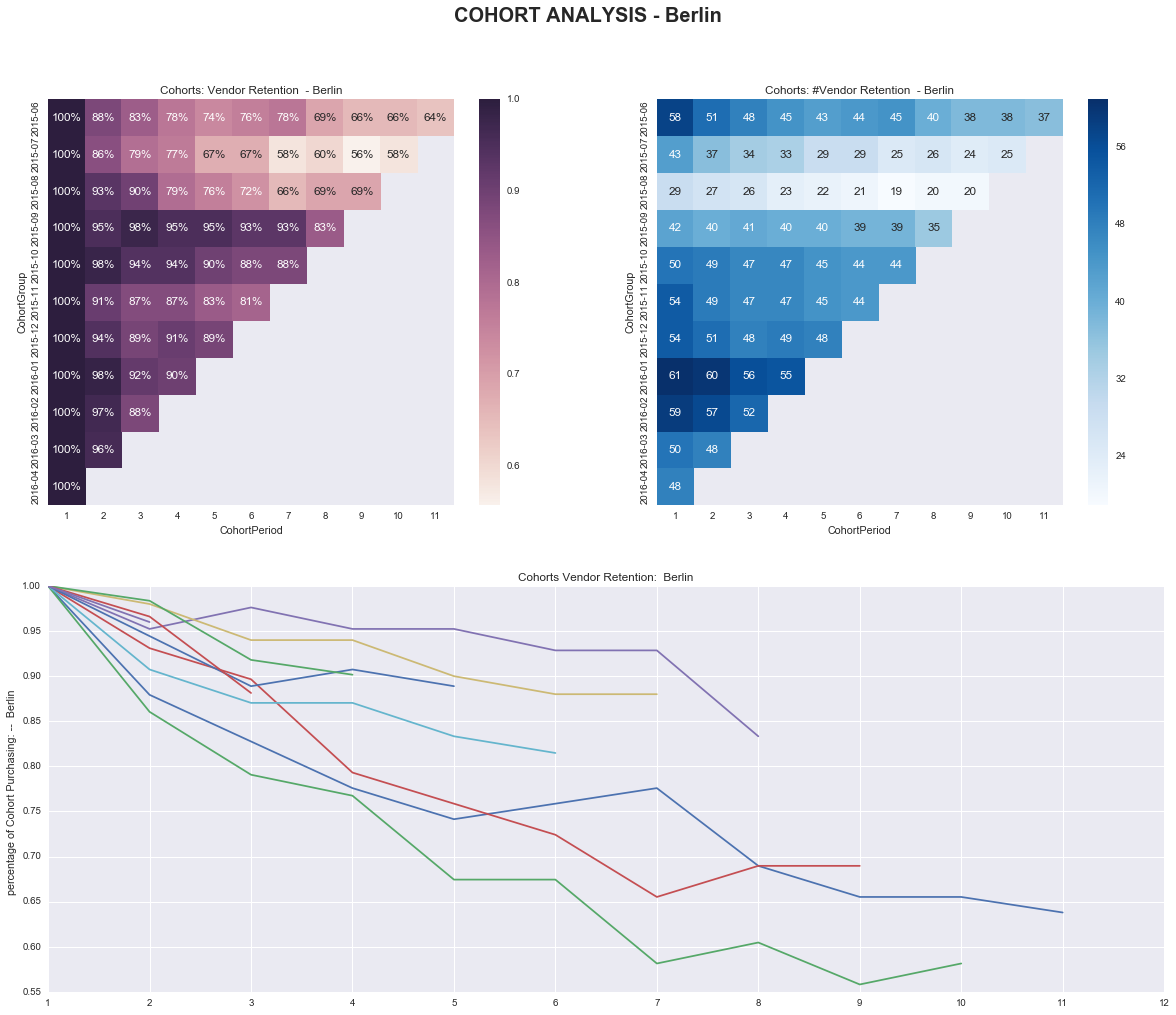

In [17]:
vendors_number = cohorts['TotalVendors'].unstack()
user_retention_abs = cohorts['TotalVendors'].unstack(0).T

fig=plt.figure( figsize=(20,16) )
sns.set(font_scale=0.98)
#fig=plt.figure(figsize=(11.69,8.27))

plt.suptitle('COHORT ANALYSIS - %s' %city_name, \
 fontweight='bold', fontsize=20)  

#1
plt.subplot(2,2,1)
plt.title('Cohorts: Vendor Retention  - %s' %city_name)

sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='0.00%')
#2
plt.subplot(2,2,2)
plt.title('Cohorts: #Vendor Retention  - %s' %city_name)

sns.heatmap(user_retention_abs,  annot=True, fmt='g', cmap='Blues')

#2
plt.subplot(2,1,2)
sns.color_palette("RdBu", n_colors=5)
plt.title('Cohorts Vendor Retention:  %s' %city_name)
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
title2 = city_name
plt.ylabel('percentage of Cohort Purchasing: --  %s  ' %city_name)
plt.plot(user_data_retention)
plt.show()
#plt.savefig('aaaaaaaaaaaaaaaaaaaaaaaaaaa'+title1 +'.png')
#plt.savefig('cohort_'+city_name +'.png')
#fig.savefig("foo3" + ".pdf", orientation = 'portrait', format='pdf')

fig.savefig("cohort_" +city_name+ ".png")

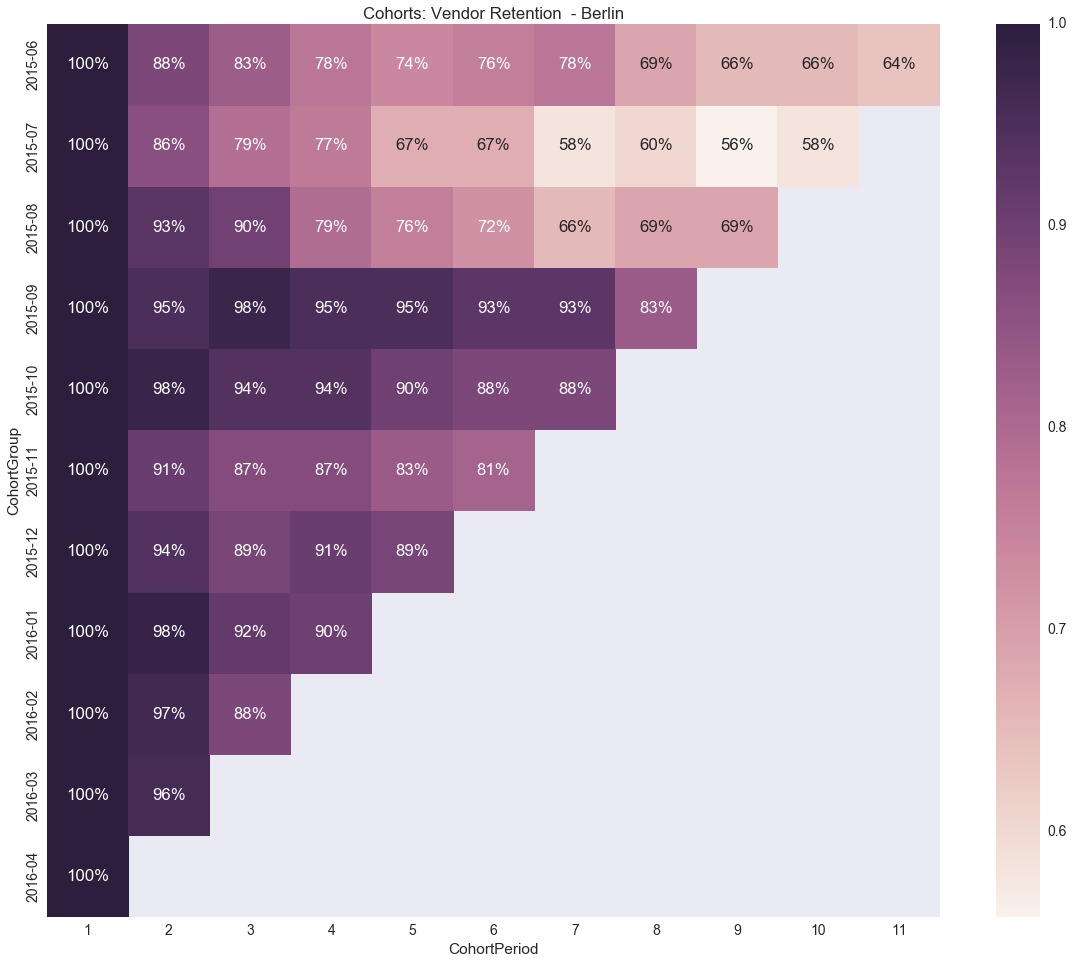

In [18]:
fig=plt.figure( figsize=(20,16) )
sns.set(font_scale=1.4)
plt.title('Cohorts: Vendor Retention  - %s' %city_name)
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='0.00%')

plt.savefig("cohort_" +city_name+ ".png")

In [19]:
user_churn = 1- cohorts['TotalVendors'].unstack(0).divide(cohort_group_size, axis=1)
user_churn

CohortGroup    2015-06   2015-07   2015-08   2015-09  2015-10   2015-11  \
CohortPeriod                                                              
1             0.000000  0.000000  0.000000  0.000000     0.00  0.000000   
2             0.120690  0.139535  0.068966  0.047619     0.02  0.092593   
3             0.172414  0.209302  0.103448  0.023810     0.06  0.129630   
4             0.224138  0.232558  0.206897  0.047619     0.06  0.129630   
5             0.258621  0.325581  0.241379  0.047619     0.10  0.166667   
6             0.241379  0.325581  0.275862  0.071429     0.12  0.185185   
7             0.224138  0.418605  0.344828  0.071429     0.12       NaN   
8             0.310345  0.395349  0.310345  0.166667      NaN       NaN   
9             0.344828  0.441860  0.310345       NaN      NaN       NaN   
10            0.344828  0.418605       NaN       NaN      NaN       NaN   
11            0.362069       NaN       NaN       NaN      NaN       NaN   

CohortGroup    2015-12   2016-01   2016-02  2016-03  2016-04  
CohortPeriod                                                  
1             0.000000  0.000000  0.000000     0.00      0.0  
2             0.055556  0.016393  0.033898     0.04      NaN  
3             0.111111  0.081967  0.118644      NaN      NaN  
4             0.092593  0.098361       NaN      NaN      NaN  
5             0.111111       NaN       NaN      NaN      NaN  
6                  NaN       NaN       NaN      NaN      NaN  
7                  NaN       NaN       NaN      NaN      NaN  
8                  NaN       NaN       NaN      NaN      NaN  
9                  NaN       NaN       NaN      NaN      NaN  
10                 NaN       NaN       NaN      NaN      NaN  
11                 NaN       NaN       NaN      NaN      NaN

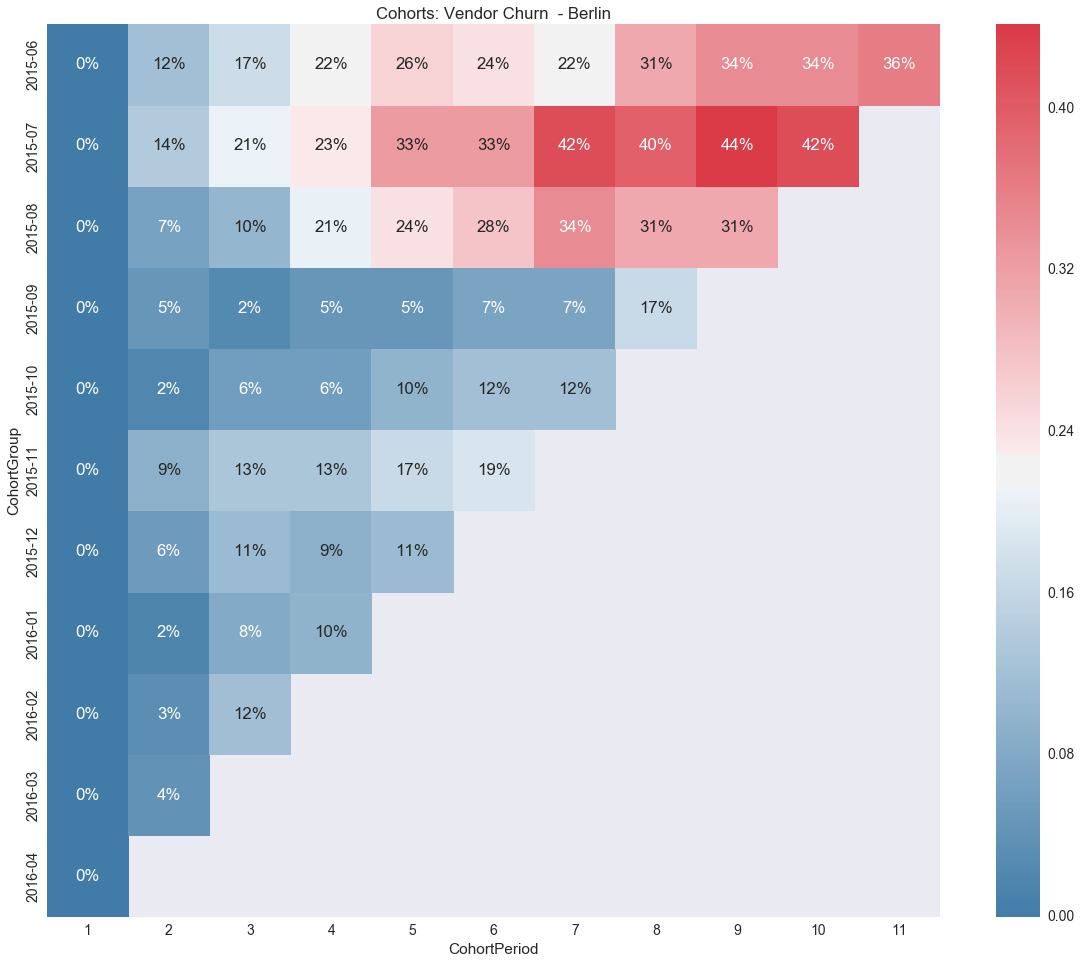

In [20]:
fig=plt.figure( figsize=(20,16) )
sns.set(font_scale=1.4)
cmap = sns.diverging_palette(240, 10, n=1000, as_cmap=True)
#sns.diverging_palette(240, 10, n=9)
plt.title('Cohorts: Vendor Churn  - %s' %city_name)
sns.heatmap(user_churn.T, mask=user_churn.T.isnull(), annot=True, fmt='0.00%', cmap=cmap)
plt.savefig("Vendor Churn" +city_name+ ".png")